In [1]:
import networkx as nx
import random
import scipy.stats as stats
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import statistics as st


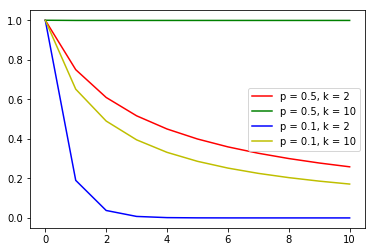

In [59]:
def q_n_iter(p, k, n):
    q_n, i = 1, 0
    q_lst = []
    while i <= n:
        q_lst.append(q_n)
        #print("Wave " + str(i) + ": ", q_n)
        q_n, i = 1 - pow(1-p*q_n,k), i+1
    return q_lst
n = 10; p = 0.5; k = 2
n_lst = list(range(0,n+1))
plt.plot(n_lst, q_n_iter(p,k,n), 'r-', label= "p = 0.5, k = 2")
p = 0.5; k = 10
plt.plot(n_lst, q_n_iter(p,k,n), 'g-', label= "p = 0.5, k = 10")
p = 0.1; k = 2
plt.plot(n_lst, q_n_iter(p,k,n), 'b-', label= "p = 0.1, k = 2")
p = 0.1; k = 10
plt.plot(n_lst, q_n_iter(p,k,n), 'y-', label= "p = 0.1, k = 10")
plt.legend()



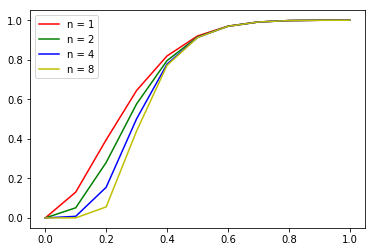

In [63]:
def q_n_iter(p, k, n):
    q_n, i = 1, 0
    while i <= n:
        #print("Wave " + str(i) + ": ", q_n)
        q_n, i = 1 - pow(1-p*q_n,k), i+1
    return q_n

k = 4; n = 1; p = 1.0
p_lst = np.linspace(0,1,11)

q_lst = [q_n_iter(p_lst[i], k, n) for i in range(0,11)]
plt.plot(p_lst, q_lst, 'r-', label= "n = 1")
n = 2
q_lst = [q_n_iter(p_lst[i], k, n) for i in range(0,11)]
plt.plot(p_lst, q_lst, 'g-', label= "n = 2")
n = 4
q_lst = [q_n_iter(p_lst[i], k, n) for i in range(0,11)]
plt.plot(p_lst, q_lst, 'b-', label= "n = 4")
n = 8
q_lst = [q_n_iter(p_lst[i], k, n) for i in range(0,11)]
plt.plot(p_lst, q_lst, 'y-', label= "n = 8")
plt.legend()

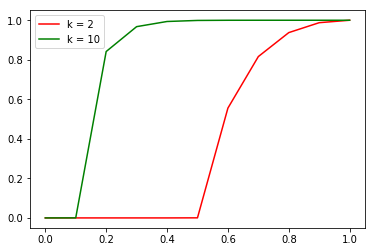

In [67]:
k = 2; n = 10000; p = 1.0
p_lst = np.linspace(0,1,11)
q_lst = [q_n_iter(p_lst[i], k, n) for i in range(0,11)]
plt.plot(p_lst, q_lst, 'r-', label= "k = 2")
k = 10
q_lst = [q_n_iter(p_lst[i], k, n) for i in range(0,11)]
plt.plot(p_lst, q_lst, 'g-', label= "k = 10")
plt.legend()

In [45]:

def simulate_sir(graph, t_infect, p_infect):
    infected = set()
    removed = set()
    infected_time = {}
    initial_node = random.choice(list(graph.nodes()))
    infected.add(initial_node)
    infected_time[initial_node] = 0
    t = 0
    while len(infected) > 0:
        t += 1
        newly_infected = set()
        newly_removed = set()
        for node in infected:
            for next_node in graph.neighbors(node):
                if next_node in infected or next_node in removed:
                    continue
                if random.random() < p_infect:
                    newly_infected.add(next_node)
            if infected_time[node] + t_infect == t:
                newly_removed.add(node)
        for node in newly_removed:
            removed.add(node)
            infected.remove(node)
        for node in newly_infected:
            infected.add(node)
            infected_time[node] = t
    return len(removed)

t_infect = 1; p_edge = 0.1; p_infect = 0.02
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 0.1; p_infect = 0.02
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))
    
t_infect = 1; p_edge = 0.5; p_infect = 0.02
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 0.5; p_infect = 0.02
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 1; p_edge = 1.0; p_infect = 0.02
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 1.0; p_infect = 0.02
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 1; p_edge = 0.1; p_infect = 0.002
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 0.1; p_infect = 0.002
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))
    
t_infect = 1; p_edge = 0.5; p_infect = 0.002
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 0.5; p_infect = 0.002
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 1; p_edge = 1.0; p_infect = 0.002
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 1.0; p_infect = 0.002
g = nx.gnp_random_graph(1000, p_edge, directed=True)
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for GNP w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))







Average outbreak for GNP w/ p = 0.1 infection time: 1 infection probability: 0.02 is 710.7
Average outbreak for GNP w/ p = 0.1 infection time: 5 infection probability: 0.02 is 1000.0
Average outbreak for GNP w/ p = 0.5 infection time: 1 infection probability: 0.02 is 1000.0
Average outbreak for GNP w/ p = 0.5 infection time: 5 infection probability: 0.02 is 1000.0
Average outbreak for GNP w/ p = 1.0 infection time: 1 infection probability: 0.02 is 1000.0
Average outbreak for GNP w/ p = 1.0 infection time: 5 infection probability: 0.02 is 1000.0
Average outbreak for GNP w/ p = 0.1 infection time: 1 infection probability: 0.002 is 1.6
Average outbreak for GNP w/ p = 0.1 infection time: 5 infection probability: 0.002 is 19.8
Average outbreak for GNP w/ p = 0.5 infection time: 1 infection probability: 0.002 is 5.1
Average outbreak for GNP w/ p = 0.5 infection time: 5 infection probability: 0.002 is 992.5
Average outbreak for GNP w/ p = 1.0 infection time: 1 infection probability: 0.002 is 

In [50]:
t_infect = 1; p_edge = 0.1; p_infect = 0.02
g = nx.watts_strogatz_graph(1000, int(1000*p_edge), 0.05).to_directed()
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for Watts-Strogatz w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 0.1; p_infect = 0.02
g = nx.watts_strogatz_graph(1000, int(1000*p_edge), 0.05).to_directed()
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for Watts-Strogatz w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))
    
t_infect = 1; p_edge = 0.5; p_infect = 0.02
g = nx.watts_strogatz_graph(1000, int(1000*p_edge), 0.05).to_directed()
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for Watts-Strogatz w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 0.5; p_infect = 0.02
g = nx.watts_strogatz_graph(1000, int(1000*p_edge), 0.05).to_directed()
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for Watts-Strogatz w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 1; p_edge = 0.1; p_infect = 0.002
g = nx.watts_strogatz_graph(1000, int(1000*p_edge), 0.05).to_directed()
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for Watts-Strogatz w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 0.1; p_infect = 0.002
g = nx.watts_strogatz_graph(1000, int(1000*p_edge), 0.05).to_directed()
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for Watts-Strogatz w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))
    
t_infect = 1; p_edge = 0.5; p_infect = 0.002
g = nx.watts_strogatz_graph(1000, int(1000*p_edge), 0.05).to_directed()
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for Watts-Strogatz w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))

t_infect = 5; p_edge = 0.5; p_infect = 0.002
g = nx.watts_strogatz_graph(1000, int(1000*p_edge), 0.05).to_directed()
avg = 0
for _ in range(0,10):
    avg += simulate_sir(g, t_infect, p_infect)
print ("Average outbreak for Watts-Strogatz w/ p = " + str(p_edge) + " infection time: " + str(t_infect) + " infection probability: " + str(p_infect) + " is " + str(avg / 10))




Average outbreak for Watts-Strogatz w/ p = 0.1 infection time: 1 infection probability: 0.02 is 554.5
Average outbreak for Watts-Strogatz w/ p = 0.1 infection time: 5 infection probability: 0.02 is 1000.0
Average outbreak for Watts-Strogatz w/ p = 0.5 infection time: 1 infection probability: 0.02 is 1000.0
Average outbreak for Watts-Strogatz w/ p = 0.5 infection time: 5 infection probability: 0.02 is 1000.0
Average outbreak for Watts-Strogatz w/ p = 0.1 infection time: 1 infection probability: 0.002 is 1.0
Average outbreak for Watts-Strogatz w/ p = 0.1 infection time: 5 infection probability: 0.002 is 4.8
Average outbreak for Watts-Strogatz w/ p = 0.5 infection time: 1 infection probability: 0.002 is 30.3
Average outbreak for Watts-Strogatz w/ p = 0.5 infection time: 5 infection probability: 0.002 is 993.7
